<a href="https://colab.research.google.com/github/CamilliCerutti/growdev/blob/main/Exercicio_join_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

# Exercícios Práticos

Crie um dataframe único com a informação do GDP e quantidade de matrículas por nível de educação por ano.

O aumento das matrículas na educação primária, secundária e terciária acompanhou o aumento do GDP per capita nos últimos 15 anos na India?

In [ ]:
import pandas as pd

In [ ]:
educ = 'https://raw.githubusercontent.com/abnr/ml-data/main/SYB61_T07_Education.csv'
gdp = 'https://raw.githubusercontent.com/abnr/ml-data/main/India_World_Bank_Info.csv'

In [ ]:
#df_educ = pd.read_csv(educ, skiprows=1,  sep = '\t', encoding = "ISO-8859-1")
df_educ = pd.read_csv(educ, header=1,   sep = '\t', encoding='unicode_escape')
#df_educ
df_gdp = pd.read_csv(gdp, sep='\t', on_bad_lines='error', skiprows=4)


In [ ]:
df_educ.rename(columns={'Unnamed: 1': 'Country'}, inplace = True)
df_educ = df_educ[df_educ['Country'] == 'India']
series = ['Students enrolled in primary education (thousands)',
          'Students enrolled in secundary education (thousands)',
          'Students enrolled in tertiary education (thousands)']
gdp = df_educ['Series'].isin(series)
df_educ = df_educ[gdp]

In [ ]:
df_educ['Value'] = df_educ['Value'].astype(str).str.replace(',', '').astype(int)

In [ ]:
df_educ.drop(['Region/Country/Area', 'Country', 'Source', 'Footnotes', 'Series'], axis=1, inplace=True)


In [ ]:
df_educ = df_educ.groupby(['Year']).sum().astype(int)

In [ ]:
filtro = df_gdp['Indicator Name'].str.contains('GDP per capita \\(current US\\$\\)')
df_gdp = df_gdp[filtro]

In [ ]:
colunas =  range (2003, 2018)
df_gdp = pd.melt(df_gdp, id_vars=['Indicator Name'],
        value_vars=list(map(str, colunas)),
        var_name='Year', value_name='Value')
df_gdp = df_gdp[['Year','Value']].groupby(['Year']).sum()
df_gdp['Value'] = df_gdp['Value'].apply(lambda o: int(round(o)))



In [ ]:
df_gdp.index = df_gdp.index.astype(int)
df = df_gdp.merge(df_educ, on='Year', how='outer', suffixes=('_gdp', '_educ'))

In [ ]:
df['Value_educ'] = df['Value_educ'].interpolate(method='krogh')
df['Value_educ'] = df['Value_educ']/10

df['Value_gdp'] = df['Value_gdp']*10
df['Value_educ'] = df['Value_educ'].astype(int)

In [ ]:
df

,Value_gdp,Value_educ
Year,,
2003,5410,13686
2004,6210,3642
2005,7070,1177
2006,7920,2975
2007,10180,6636
2008,9910,10554
2009,10900,13784
2010,13460,15915
2011,14620,16945


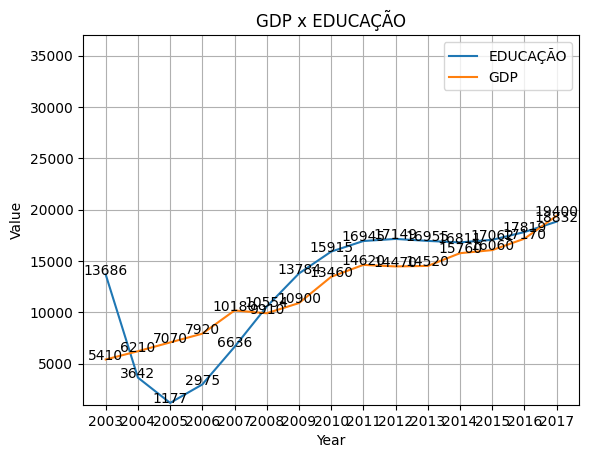

,Value_gdp,Value_educ
Year,,
2003,5410,13686
2004,6210,3642
2005,7070,1177
2006,7920,2975
2007,10180,6636
2008,9910,10554
2009,10900,13784
2010,13460,15915
2011,14620,16945


In [ ]:
import matplotlib.pyplot as plt

x = df.index
y1 = df['Value_educ']
y2 = df['Value_gdp']

plt.plot(x, y1, label='EDUCAÇÃO')
plt.plot(x, y2, label='GDP')
for i, j in zip(x, y1):
    plt.text(i, j, str(j), ha='center')
for i, j in zip(x, y2):
    plt.text(i, j, str(j), ha='center')

plt.xticks(x)
plt.ylim([1000, 37000])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('GDP x EDUCAÇÃO')
plt.legend()
plt.show()
df